In [1]:
from __future__ import absolute_import, division, print_function

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
# Set Eager API
tf.enable_eager_execution()
tfe = tf.contrib.eager

In [3]:
# Training Data
train_X = [3.3, 4.4, 5.5, 6.71, 6.93, 4.168, 9.779, 6.182, 7.59, 2.167,
           7.042, 10.791, 5.313, 7.997, 5.654, 9.27, 3.1]
train_Y = [1.7, 2.76, 2.09, 3.19, 1.694, 1.573, 3.366, 2.596, 2.53, 1.221,
           2.827, 3.465, 1.65, 2.904, 2.42, 2.94, 1.3]
n_samples = len(train_X)

# Parameters
learning_rate = 0.01
display_step = 100
num_steps = 1000

In [4]:
# Weight and Bias
W = tfe.Variable(np.random.randn())
b = tfe.Variable(np.random.randn())

# Linear regression (Wx + b)
def linear_regression(inputs):
    return inputs * W + b

# Mean square error
def mean_square_fn(model_fn, inputs, labels):
    return tf.reduce_sum(tf.pow(model_fn(inputs) - labels, 2)) / (2 * n_samples)

In [5]:
# SGD Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)

# Compute gradients
grad = tfe.implicit_gradients(mean_square_fn)


Initial cost= 42.655147552 W= -0.8761839 b= -1.0181745
Epoch: 0001 cost= 12.995614052 W= -0.2635817 b= -0.92975295
Epoch: 0100 cost= 0.205217808 W= 0.45469958 b= -0.6408357
Epoch: 0200 cost= 0.177550957 W= 0.43147498 b= -0.47618386
Epoch: 0300 cost= 0.155850753 W= 0.41090655 b= -0.33036298
Epoch: 0400 cost= 0.138830408 W= 0.3926906 b= -0.20121981
Epoch: 0500 cost= 0.125480682 W= 0.37655798 b= -0.086846896
Epoch: 0600 cost= 0.115009956 W= 0.36227047 b= 0.014445134
Epoch: 0700 cost= 0.106797390 W= 0.349617 b= 0.104152344
Epoch: 0800 cost= 0.100355923 W= 0.33841076 b= 0.18359968
Epoch: 0900 cost= 0.095303625 W= 0.32848614 b= 0.25396058
Epoch: 1000 cost= 0.091340914 W= 0.31969666 b= 0.3162742


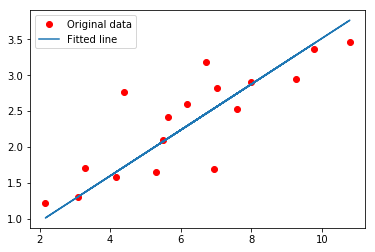

In [6]:
# Initial cost, before optimizing
print("Initial cost= {:.9f}".format(
    mean_square_fn(linear_regression, train_X, train_Y)),
    "W=", W.numpy(), "b=", b.numpy())

# Training
for step in range(num_steps):

    optimizer.apply_gradients(grad(linear_regression, train_X, train_Y))

    if (step + 1) % display_step == 0 or step == 0:
        print("Epoch:", '%04d' % (step + 1), "cost=",
              "{:.9f}".format(mean_square_fn(linear_regression, train_X, train_Y)),
              "W=", W.numpy(), "b=", b.numpy())

# Graphic display
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.plot(train_X, np.array(W * train_X + b), label='Fitted line')
plt.legend()
plt.show()
